In [2]:
!pip install praw 
# Install the PRAW library for Reddit API access.


In [3]:
import praw 
# Importing the PRAW library for accessing Reddit's API.

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"  # Define user agent for Reddit access.
reddit = praw.Reddit(
    client_id="M1vXAxKH25FcNKVuLGKsyg",
    client_secret="srOz_3ClIqzAK2ziDBGzBlFSgITXjQ",
    user_agent=user_agent
)

In [4]:
import pandas as pd  # Import pandas for data manipulation.
import numpy as np  # Import numpy for numerical computations.
import re  # Import re for regular expressions.

In [5]:
# Looping through hot submissions in the trending subreddit and printing relevant information.
headlines = set()  # Initialize a set to store unique submission titles.
for submission in reddit.subreddit("worldnews").hot(limit=None):
    print(submission.title)  # Print submission title.
    print(submission.id)  # Print submission ID.
    print(submission.author)  # Print submission author.
    print(submission.created_utc)  # Print submission creation time in UTC.
    print(submission.score)  # Print submission score.
    print(submission.upvote_ratio)  # Print submission upvote ratio.
    print(submission.url)  # Print submission URL.
    break  # Break the loop after processing the first submission.
    headlines.add(submission.title)
print(len(headlines))  # Print the count of unique titles.

/r/WorldNews Live Thread: Russian Invasion of Ukraine Day 792, Part 1 (Thread #938)
1cciknh
WorldNewsMods
1714017757.0
1100
0.97
https://www.reddit.com/live/18hnzysb1elcs
0


In [6]:
# Collect unique submission titles from hot posts in the trending subreddit and print the count.
headlines = set()  # Re-initialize the set to store unique submission titles.
for submission in reddit.subreddit("worldnews").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))  # Print the count of unique titles.

629


In [7]:
# Create a DataFrame from the scrapped data.
trending_df = pd.DataFrame(headlines)
trending_df.head()  # Display the first few rows of the DataFrame.

,0
0,Russia detains ally of Defense Minister Shoigu...
1,UN rights chief ‘horrified’ by reports of mass...
2,Navalnaya Warns Of Putin's Willingness To Stri...
3,Germany targeting Indian students to address l...
4,Singaporean man suspected of killing woman in ...


In [8]:

trending_df.columns  # Retrieve the column names of the DataFrame trending_df.


RangeIndex(start=0, stop=1, step=1)

In [9]:
trending_df.columns = ['Titles']  # Rename the column of the DataFrame trending_df to 'Titles'.


In [10]:
trending_df.head()  # Display the first few rows of the DataFrame.

,Titles
0,Russia detains ally of Defense Minister Shoigu...
1,UN rights chief ‘horrified’ by reports of mass...
2,Navalnaya Warns Of Putin's Willingness To Stri...
3,Germany targeting Indian students to address l...
4,Singaporean man suspected of killing woman in ...


In [11]:
trending_df.Titles.duplicated().sum()  # Calculate the number of duplicated titles in the 'Titles' column of trending_df.

0

In [12]:
# Create a function to clean the titles.
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove @mentions replace with blank.
    text = re.sub(r'#', '', text)  # Remove the '#' symbol, replace with blank.
    text = re.sub(r'RT[\s]+', '', text)  # Removing RT, replace with blank.
    text = re.sub(r'https?:\/\/\S+', '', text)  # Remove the hyperlinks.
    text = re.sub(r':', '', text)  # Remove :.

    return text

# Cleaning the titles.
trending_df["Titles"] = trending_df["Titles"].apply(cleanTxt)

# Show the clean titles.
trending_df.head()


,Titles
0,Russia detains ally of Defense Minister Shoigu...
1,UN rights chief ‘horrified’ by reports of mass...
2,Navalnaya Warns Of Putin's Willingness To Stri...
3,Germany targeting Indian students to address l...
4,Singaporean man suspected of killing woman in ...


In [13]:
# Next, remove emojis and Unicode from the titles.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Cleaning the titles.
trending_df["Titles"] = trending_df["Titles"].apply(remove_emoji)

# Show the clean titles.
trending_df.head()

,Titles
0,Russia detains ally of Defense Minister Shoigu...
1,UN rights chief ‘horrified’ by reports of mass...
2,Navalnaya Warns Of Putin's Willingness To Stri...
3,Germany targeting Indian students to address l...
4,Singaporean man suspected of killing woman in ...


In [14]:
!pip install textblob

In [15]:
from textblob import TextBlob  # Import TextBlob for sentiment analysis.
from wordcloud import WordCloud, STOPWORDS  # Import WordCloud and STOPWORDS for word cloud generation.

In [16]:
# Create a function to get the subjectivity.
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get polarity.
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Now we create new columns for subjectivity and polarity.
trending_df['Subjectivity'] = trending_df['Titles'].apply(getSubjectivity)
trending_df['Polarity'] = trending_df['Titles'].apply(getPolarity)

# Now display data.
trending_df.head()

,Titles,Subjectivity,Polarity
0,Russia detains ally of Defense Minister Shoigu...,0.0,0.0
1,UN rights chief ‘horrified’ by reports of mass...,0.0,0.0
2,Navalnaya Warns Of Putin's Willingness To Stri...,0.0,0.0
3,Germany targeting Indian students to address l...,0.0,0.0
4,Singaporean man suspected of killing woman in ...,0.0,0.0


In [17]:

# Group the range of polarity to different categories.
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
trending_df["Insight"] = trending_df["Polarity"].apply(getInsight)
trending_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Russia detains ally of Defense Minister Shoigu...,0.000000,0.000000,Neutral
1,UN rights chief ‘horrified’ by reports of mass...,0.000000,0.000000,Neutral
2,Navalnaya Warns Of Putin's Willingness To Stri...,0.000000,0.000000,Neutral
3,Germany targeting Indian students to address l...,0.000000,0.000000,Neutral
4,Singaporean man suspected of killing woman in ...,0.000000,0.000000,Neutral
5,Taiwan will tear down all remaining statues of...,0.177778,-0.077778,Negative
6,France being ‘pounded’ by Russian disinformati...,0.000000,0.000000,Neutral
7,"Four dead, tens of thousands evacuated as floo...",0.400000,-0.200000,Negative
8,"Iran Plays Down Israeli Strikes, Averts Escala...",0.288889,-0.155556,Negative
9,"‘Difficult situation’ awaits Ukraine in May, s...",0.550000,-0.300000,Negative


In [18]:
import seaborn as sns  # Import seaborn for data visualization.
import warnings  # Import warnings to handle warnings.
import matplotlib.pyplot as plt  # Import matplotlib for plotting.
plt.style.use('fivethirtyeight')  # Set plot style.


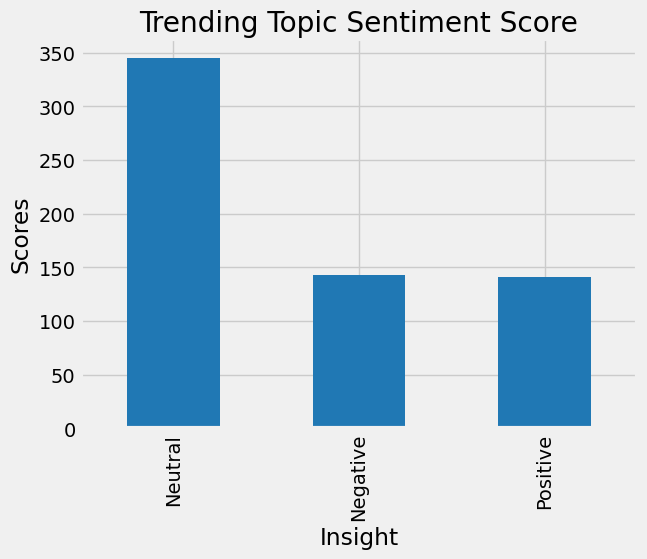

In [19]:
# Plot the values count of sentiment.
plt.title("Trending Topic Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10, 8)
trending_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()


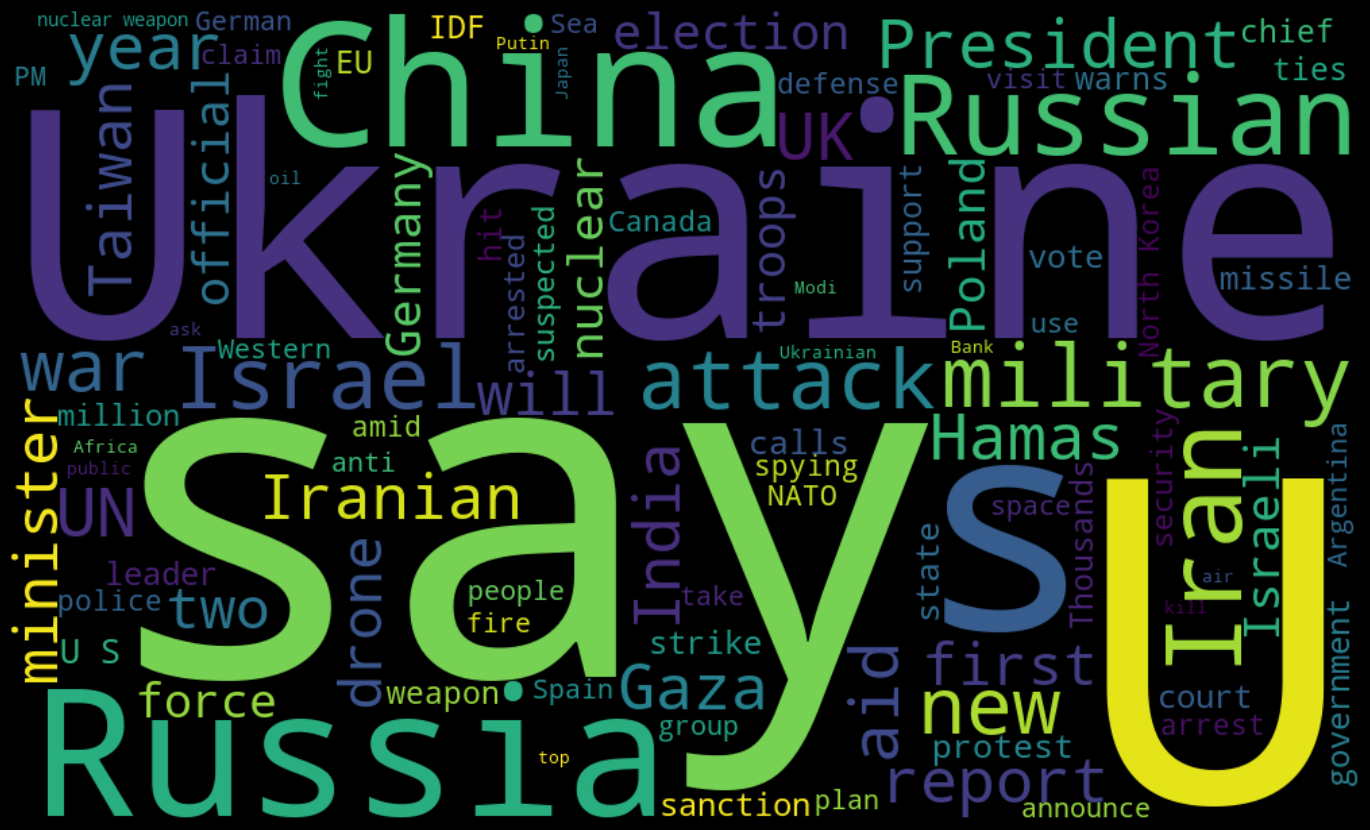

In [20]:
# Join all tweet text to generate word cloud.
text = ' '.join([titles for titles in trending_df['Titles']])

# Generate word cloud.
wordcloud = WordCloud(width=1000, height=600,
                      max_words=100,
                      stopwords=STOPWORDS,
                      background_color="black").generate(text)

# Display the generated image.
plt.figure(figsize=(20, 10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");